In [18]:
import tensorflow as tf
import numpy as np

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [20]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [21]:
xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

In [22]:
# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [23]:
'''
[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
'''

'\n[[0.99999999 0.99999999 0.         1.         1.        ]\n [0.70548491 0.70439552 1.         0.71881782 0.83755791]\n [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]\n [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]\n [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]\n [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]\n [0.11436064 0.         0.20652174 0.22007776 0.18597238]\n [0.         0.07747099 0.5326087  0.         0.        ]]\n'

In [24]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [25]:
model = tf.keras.Sequential()

In [26]:
model.add(tf.keras.layers.Dense(units=1, input_dim=4))

In [27]:
model.add(tf.keras.layers.Activation('linear'))

In [28]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_data, y_data, epochs=1000, verbose=0)

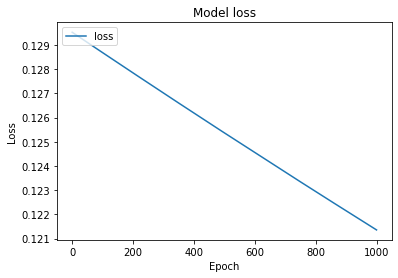

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [32]:
predictions = model.predict(x_data)

In [33]:
score = model.evaluate(x_data, y_data)

1/1 [==============================] - 0s 1ms/step - loss: 0.1213


In [34]:
print('Prediction: \n', predictions)
print('Cost: ', score)

Prediction: 
 [[ 0.7996644 ]
 [ 0.2678421 ]
 [ 0.17431891]
 [ 0.11108481]
 [ 0.16989249]
 [ 0.24652827]
 [-0.17809719]
 [-0.0617085 ]]
Cost:  0.12134911864995956
